In [12]:
import numpy as np
%load_ext autoreload
%autoreload 2

import torch
import sys

sys.path.append('..')

from algorithms.sequence_models.config import TrainConfig

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device is ", device)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
device is  cuda


In [13]:
from algorithms.sequence_models.decision_S4.dts4 import DecisionS4
from envs.umbrella_length import get_umbrella_length_env
from data.umbrella_length_dataset import UmbrellaLengthDataset
from comparison_experiment import AutomatedComparisonExperiment

chain_length = 5
env = get_umbrella_length_env(chain_length=chain_length)

max_eval_ep_len = chain_length + 2 # todo change for other envs
context_len = chain_length + 2  # todo change for other envs

config = TrainConfig(max_eval_ep_len=max_eval_ep_len, context_len=max_eval_ep_len)

n_trajectories = 10_000 # todo is this enough / too much?
experiment_name = f"experiment_umbrella_length_{chain_length}_dataset_size={n_trajectories}"
if UmbrellaLengthDataset.exists(experiment_name):
    traj_dataset = UmbrellaLengthDataset.load(experiment_name)
else:
    reward_scale = 1 # todo change for other envs
    traj_dataset = UmbrellaLengthDataset(env, n_trajectories=n_trajectories, reward_scale=reward_scale)
    traj_dataset.save(experiment_name)

comparison_experiment = AutomatedComparisonExperiment(
    env=env,
    traj_dataset=traj_dataset,
    config=config,
    device=device,
    rtgs_for_train_eval=np.linspace(-1.2, 1.2, 8, endpoint=True), # todo change for other envs
    rtgs_final_test=np.linspace(-1.2, 1.2, 15, endpoint=True), # todo change for other envs
    env_name=f"umbrella_length_{chain_length}", # todo change for other envs
    experiment_name="automated_comparison"
)

number of parameters 597658
number of parameters 1126426


In [16]:
epochs = 10 # todo set to 200

distribution of rewards in the dataset
training started


  0%|          | 0/10 [00:00<?, ?it/s]

time elapsed: 0:00:01
num of updates: 1800
loss: 0.24253
lr 0.00019
grad_norm 0.23936
time elapsed: 0:00:02
num of updates: 1900
loss: 0.24189
lr 0.00020
grad_norm 0.23707
time elapsed: 0:00:02
num of updates: 2000
loss: 0.24206
lr 0.00021
grad_norm 0.24035
time elapsed: 0:00:03
num of updates: 2100
loss: 0.24209
lr 0.00022
grad_norm 0.22939
time elapsed: 0:00:03
num of updates: 2200
loss: 0.24216
lr 0.00023
grad_norm 0.24149
time elapsed: 0:00:04
num of updates: 2300
loss: 0.24177
lr 0.00024
grad_norm 0.23660
time elapsed: 0:00:05
num of updates: 2400
loss: 0.24220
lr 0.00025
grad_norm 0.24328
time elapsed: 0:00:05
num of updates: 2500
loss: 0.24077
lr 0.00026
grad_norm 0.21590
time elapsed: 0:00:06
num of updates: 2600
loss: 0.24086
lr 0.00027
grad_norm 0.24352
time elapsed: 0:00:06
num of updates: 2700
loss: 0.24128
lr 0.00028
grad_norm 0.23875
saving current model at: /home/shayan/projects/RL-credit-assignment-experiment/logs/umbrella_length_5/dt/automated_comparison/automated_comp

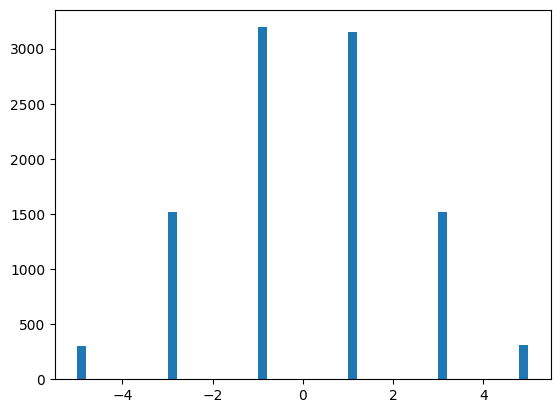

<Figure size 640x480 with 0 Axes>

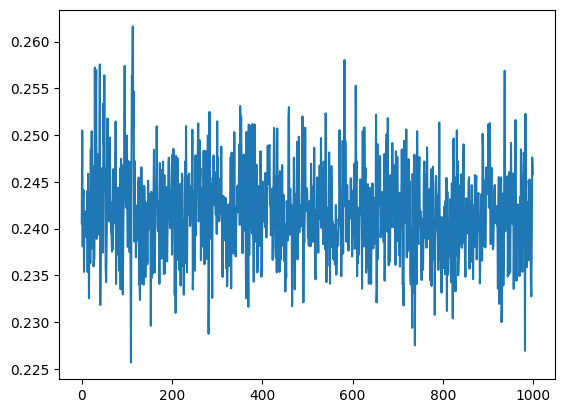

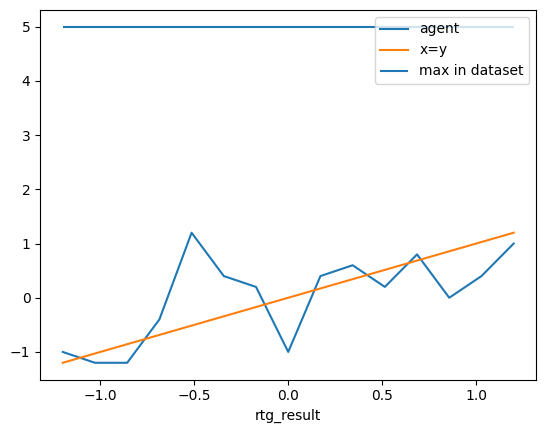

In [17]:
comparison_experiment.run_and_report(comparison_experiment.dt_experiment, epochs=epochs)

distribution of rewards in the dataset
training started


  0%|          | 0/10 [00:00<?, ?it/s]

time elapsed: 0:00:00
num of updates: 2800
loss: 0.24074
lr 0.00029
grad_norm 0.11435
time elapsed: 0:00:01
num of updates: 2900
loss: 0.24113
lr 0.00030
grad_norm 0.19825
time elapsed: 0:00:01
num of updates: 3000
loss: 0.24050
lr 0.00031
grad_norm 0.24466
saving current model at: /home/shayan/projects/RL-credit-assignment-experiment/logs/umbrella_length_5/dt/automated_comparison/automated_comparison_size=10000_model_model_24-05-12-06-03-53.pt
saving checkpoint model at: /home/shayan/projects/RL-credit-assignment-experiment/logs/umbrella_length_5/dt/automated_comparison/automated_comparison_size=10000_model24-05-12-06-03-53checkpoint__30.pt
saving best model at: /home/shayan/projects/RL-credit-assignment-experiment/logs/umbrella_length_5/dt/automated_comparison/automated_comparison_size=10000_model_model_24-05-12-06-03-53_best.pt
evaluating the model: 
evaluation saved at: /home/shayan/projects/RL-credit-assignment-experiment/logs/umbrella_length_5/dt/automated_comparison/automated_co

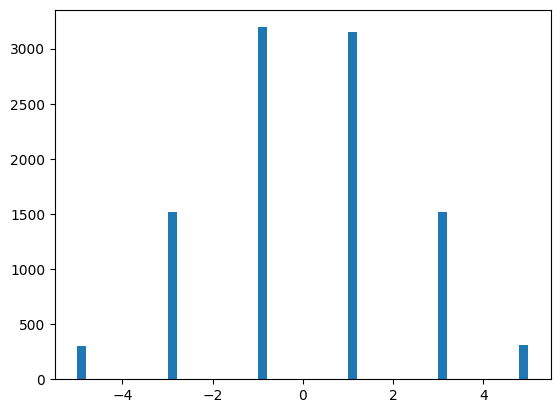

<Figure size 640x480 with 0 Axes>

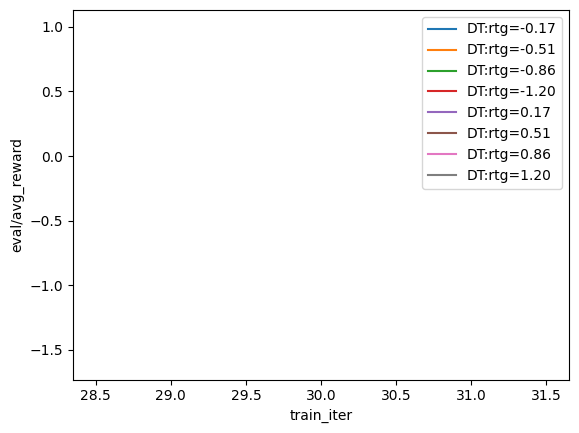

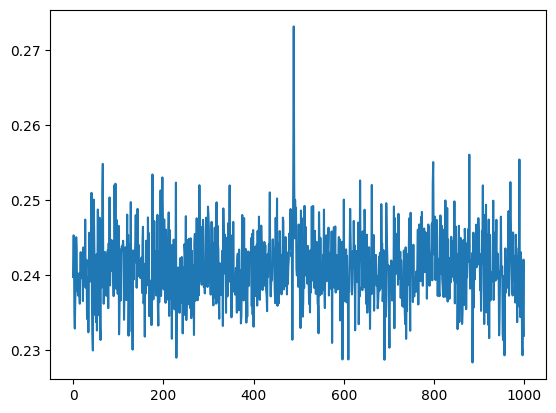

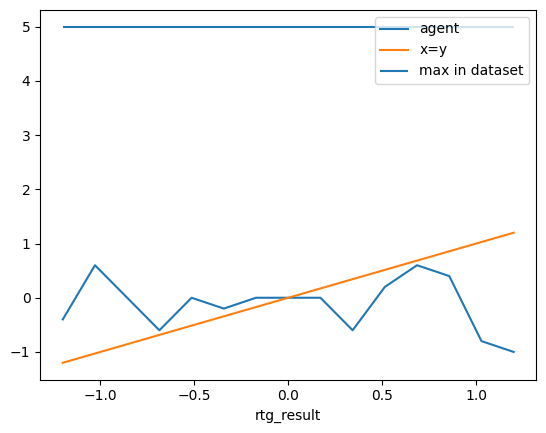

In [18]:
comparison_experiment.run_and_report(comparison_experiment.s4_experiment, epochs=epochs)